# Linear Regression

Erin De Pree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

## Data

In [107]:
heat_reported_deaths = pd.read_csv('../data/final/hot_final_dataset.csv').drop(columns=['Unnamed: 0'])
cold_reported_deaths = pd.read_csv('../data/final/cold_final_dataset.csv').drop(columns=['Unnamed: 0'])

In [108]:
heat_waves = pd.read_csv('../data/final/heat_events_final.csv').drop(columns=['Unnamed: 0'])
cold_waves = pd.read_csv('../data/final/cold_events_final.csv').drop(columns=['Unnamed: 0'])

## Model: Cold Events

In [109]:
cold_reported_deaths.columns

Index(['country', 'subregion', 'region', 'location', 'temperature',
       'start_year', 'start_month', 'total_deaths', 'start_date', 'end_date',
       'duration_days', 'duration', 'latitude', 'longitude', 'delta_temp_C',
       'delta_temp_std'],
      dtype='object')

In [110]:
cold_reported_deaths['total_deaths'].sum()

3207.0

### Linear Model

In [111]:
cold_reported_deaths.head()

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,Afghanistan,Southern Asia,Asia,"Hirat, Faryab, Jawzjan, Balkh, Samangan, Sar-e...",-25.0,2001,1,150.0,2001-01-31,2001-02-20,20 days,20,30.0,70.0,-24.856821,-8.561158
1,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0,-15.941674,-4.306348
2,Poland,Eastern Europe,Europe,"Dolnoslaskie, Kujawsko-Pomorskie, Lodzkie, Lub...",-25.0,2001,10,270.0,2001-10-10,2002-01-20,102 days,102,50.0,20.0,-15.941674,-4.306348
3,Peru,Latin America and the Caribbean,Americas,"Ayacucho, Huancavelica, Tacna, Moquegua, Arequ...",-28.0,2003,7,339.0,2003-07-07,2003-08-15,39 days,39,-10.0,-70.0,-43.303703,-20.441972
4,South Africa,Sub-Saharan Africa,Africa,"Gauteng, Eastern Cape provinces",0.0,2007,5,22.0,2007-05-21,2007-05-27,6 days,6,-30.0,30.0,-1.690848,-0.672643


In [112]:
X = cold_reported_deaths[['duration', 'delta_temp_C']]
y = cold_reported_deaths['total_deaths']

In [90]:
X.head()

,duration,delta_temp_C
0,20,-24.856821
1,102,-15.941674
2,102,-15.941674
3,39,-43.303703
4,6,-1.690848


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=92)

In [92]:
# ct = ColumnTransformer([
#    ('ss', StandardScaler(), ['duration', 'delta_temp_C'])
#], remainder='passthrough')

In [93]:
pipe_cold = Pipeline([
    #('ct', ct),
    ('lr', LinearRegression())
])

In [94]:
pipe_cold.fit(X_train, y_train)

Pipeline(steps=[('lr', LinearRegression())])

In [95]:
pipe_cold.score(X_train, y_train)

0.5955890094058326

In [96]:
pipe_cold.score(X_test, y_test)

0.5727877984840695

The $R^2$ scores are similar for both the training and testing sets.  So this is a reasonable model.  I'm going to use the entire data set to train the model.

In [97]:
pipe_cold.fit(X,y)

Pipeline(steps=[('lr', LinearRegression())])

In [98]:
pipe_cold.score(X,y)

0.5923115169045794

In [99]:
coefs_cold = pipe_cold.named_steps['lr'].coef_
intercept_cold = pipe_cold.named_steps['lr'].intercept_

In [100]:
pd.DataFrame(coefs_cold, index=X.columns.to_list(), columns=['coefficients'])

,coefficients
duration,2.294061
delta_temp_C,-1.250491


In [101]:
intercept_cold

7.325296465039244

In [102]:
preds = pipe_cold.predict(X)

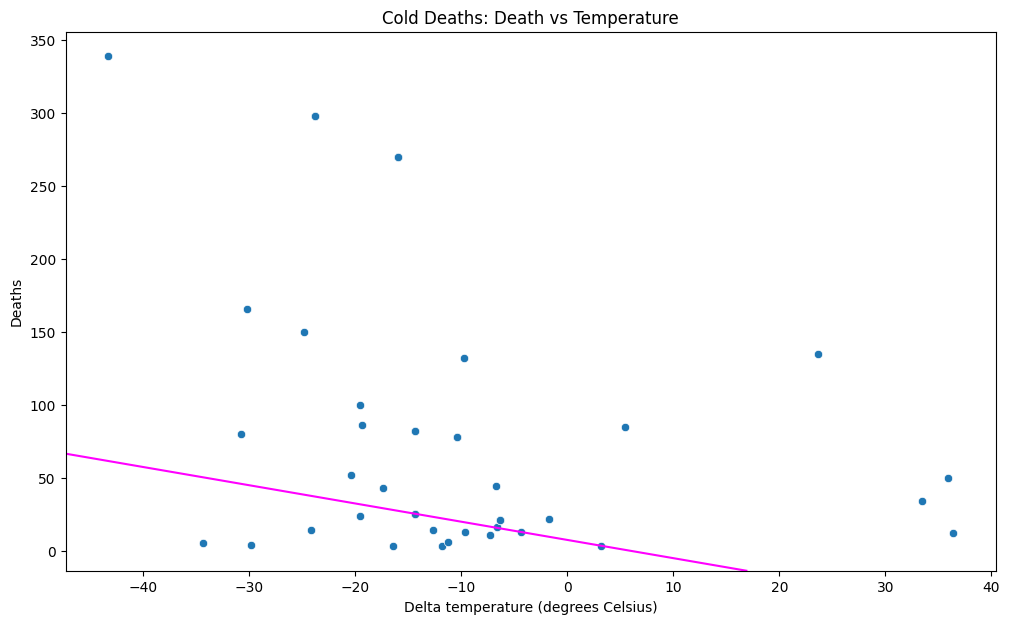

In [103]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=X['delta_temp_C'], y=y)

ax.axline(xy1=(0,intercept_cold), slope = coefs_cold[1], color= 'magenta')
ax.set_xlabel('Delta temperature (degrees Celsius)')
ax.set_ylabel('Deaths')
ax.set_title('Cold Deaths: Death vs Temperature');

plt.savefig('../images/cold_linear_temperature.jpg')

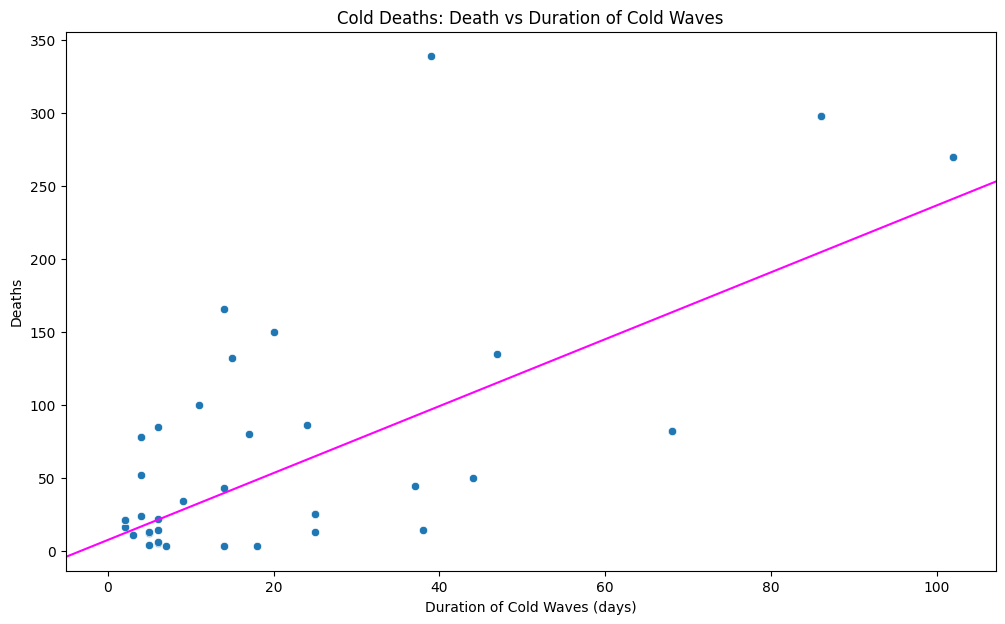

In [104]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=X['duration'], y=y)

ax.axline(xy1=(0,intercept_cold), slope = coefs_cold[0], color= 'magenta')
ax.set_xlabel('Duration of Cold Waves (days)')
ax.set_ylabel('Deaths')
ax.set_title('Cold Deaths: Death vs Duration of Cold Waves');

plt.savefig('../images/cold_linear_duration.jpg')

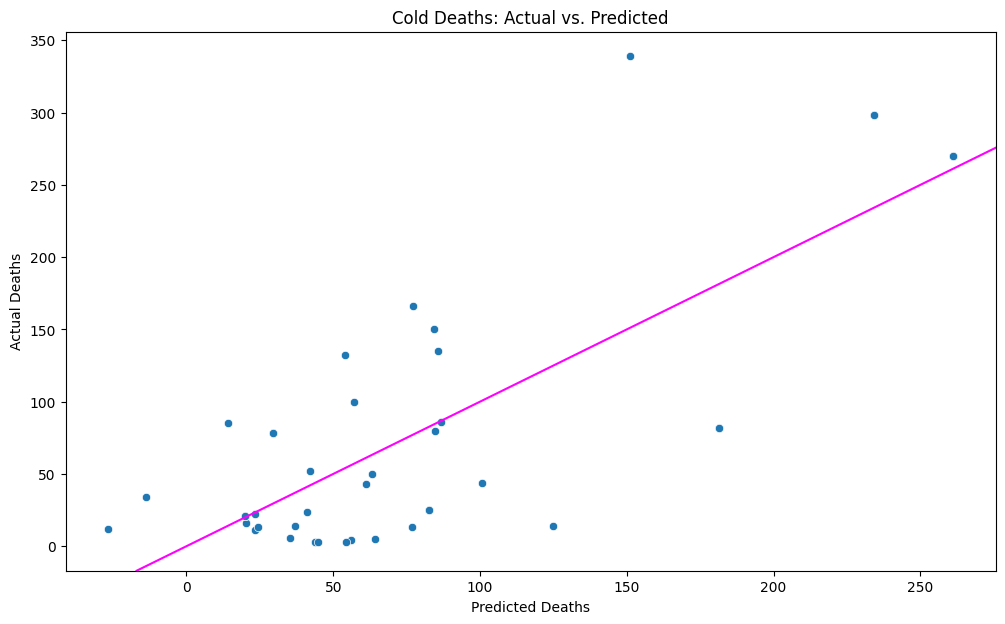

In [105]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=preds, y=y)

ax.axline(xy1=(0,0), slope = 1, color= 'magenta')
ax.set_xlabel('Predicted Deaths')
ax.set_ylabel('Actual Deaths')
ax.set_title('Cold Deaths: Actual vs. Predicted');

plt.savefig('../images/cold_deaths_prediction_linear.jpg')

### Predicting Deaths

In [106]:
X_unk = cold_waves[['duration', 'delta_min_mean_C']].rename(columns={'delta_min_mean_C':'delta_temp_C'})
X_unk['delta_temp_C'].describe()

#X_unk.head()

count    24.000000
mean    -15.596198
std       8.778136
min     -27.287639
25%     -23.160820
50%     -15.723379
75%      -6.210488
max      -5.403287
Name: delta_temp_C, dtype: float64

In [113]:
cold_preds = pd.DataFrame(pipe_cold.predict(X_unk), columns=['predicted_deaths'])
cold_deaths = pd.merge(left=X_unk, right=cold_preds, left_index=True, right_index=True)

In [114]:
cold_deaths['predicted_deaths'].sum()

804.4610636227669

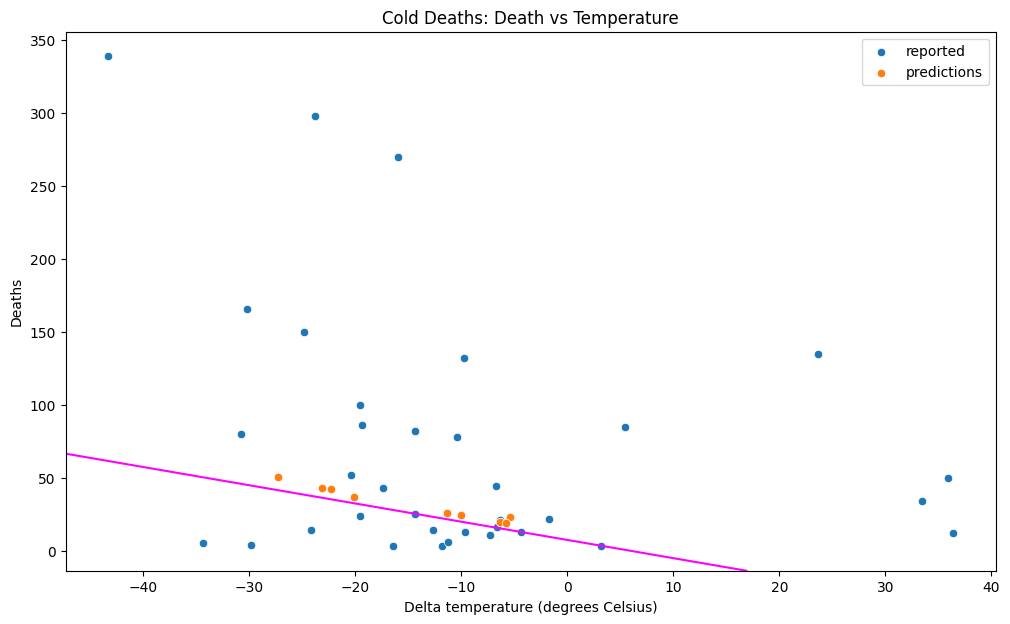

In [115]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=X['delta_temp_C'], y=y, label='reported', ax=ax)
sns.scatterplot(data=cold_deaths, x='delta_temp_C', y='predicted_deaths', label='predictions', ax=ax)

ax.axline(xy1=(0,intercept_cold), slope = coefs_cold[1], color= 'magenta')
ax.set_xlabel('Delta temperature (degrees Celsius)')
ax.set_ylabel('Deaths')
ax.set_title('Cold Deaths: Death vs Temperature');

plt.savefig('../images/cold_linear_temperature_predictions.jpg')

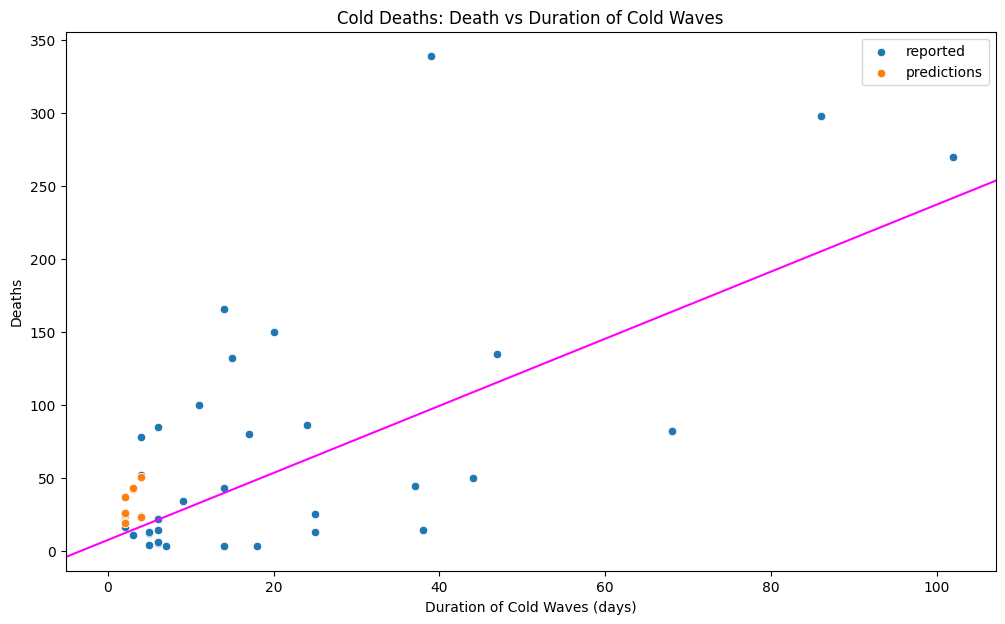

In [116]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=X['duration'], y=y, ax=ax, label= 'reported')
sns.scatterplot(data=cold_deaths, x='duration', y='predicted_deaths', label='predictions', ax=ax)

ax.axline(xy1=(0,7.3), slope = 2.3, color= 'magenta')
ax.set_xlabel('Duration of Cold Waves (days)')
ax.set_ylabel('Deaths')
ax.set_title('Cold Deaths: Death vs Duration of Cold Waves');

plt.savefig('../images/cold_linear_duration_predictions.jpg')

## Model: Heat Events

In [119]:
heat_reported_deaths['total_deaths'].sum()

87647.0

### Linear Model

In [117]:
heat_reported_deaths.head()

,country,subregion,region,location,temperature,start_year,start_month,total_deaths,start_date,end_date,duration_days,duration,latitude,longitude,delta_temp_C,delta_temp_std
0,India,Southern Asia,Asia,"Madhya Pradesh, Andhra Pradesh, Uttar Pradesh,...",50.0,2002,5,1030.0,2002-05-10,2002-05-22,12 days,12,20.0,80.0,26.641818,13.398198
1,Bangladesh,Southern Asia,Asia,"Dhaka, Khulna, Rajshahi provinces",40.0,2003,5,62.0,2003-05-10,2003-06-12,33 days,33,30.0,90.0,55.978310,16.904774
2,India,Southern Asia,Asia,"Andhra Pradesh, Orissa, Tamil Nadu, Vidarbha (...",49.0,2003,5,1210.0,2003-05-14,2003-06-06,23 days,23,20.0,80.0,26.180573,12.736790
3,Pakistan,Southern Asia,Asia,Punjab province,50.0,2003,5,200.0,2003-05-01,2003-06-06,36 days,36,30.0,70.0,36.546045,13.309940
4,Czechia,Eastern Europe,Europe,"Jihocesky, Jihomoravsky, Praha, Severocesky, S...",25.0,2003,7,418.0,2003-07-19,2003-07-22,3 days,3,50.0,20.0,15.662070,6.781608


In [118]:
Z = heat_reported_deaths[['duration', 'delta_temp_C']]
w = heat_reported_deaths['total_deaths']

In [120]:
Z.head()

,duration,delta_temp_C
0,12,26.641818
1,33,55.978310
2,23,26.180573
3,36,36.546045
4,3,15.662070


In [30]:
Z_train, Z_test, w_train, w_test = train_test_split(Z, w, random_state=92)

In [31]:
pipe_hot = Pipeline([
    #('ct', ct),
    ('lr', LinearRegression())
])

In [32]:
pipe_hot.fit(Z_train, w_train)

Pipeline(steps=[('lr', LinearRegression())])

In [33]:
pipe_hot.score(Z_train, w_train)

0.06481226857468625

In [34]:
pipe_hot.score(Z_test, w_test)

-0.06735589032299538

The $R^2$ scores are similar for both the training and testing sets.  So this is a reasonable model.  I'm going to use the entire data set to train the model.

In [35]:
pipe_hot.fit(Z,w)

Pipeline(steps=[('lr', LinearRegression())])

In [121]:
pipe_hot.score(Z,w)

0.031720442744440414

In [122]:
coefs_hot = pipe_hot.named_steps['lr'].coef_
intercept_hot = pipe_hot.named_steps['lr'].intercept_

In [123]:
pd.DataFrame(coefs_hot, index=Z.columns.to_list(), columns=['coefficients'])

,coefficients
duration,12.294765
delta_temp_C,47.641785


In [124]:
intercept_hot

-408.5070036360137

In [125]:
preds = pipe_hot.predict(Z)

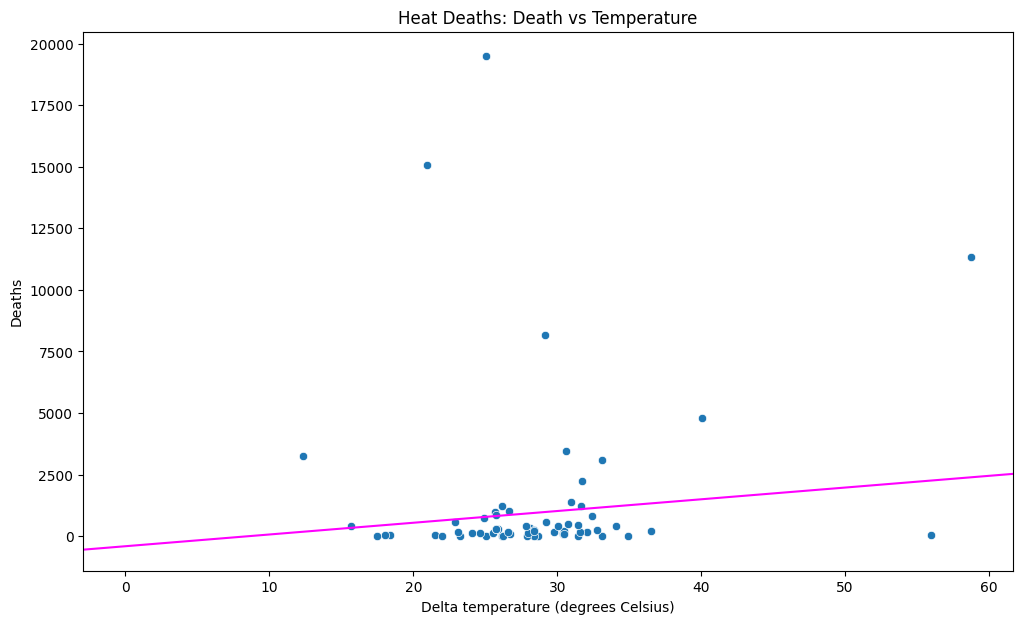

In [126]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=Z['delta_temp_C'], y=w)

ax.axline(xy1=(0,-408), slope = 47.64, color= 'magenta')
ax.set_xlabel('Delta temperature (degrees Celsius)')
ax.set_ylabel('Deaths')
ax.set_title('Heat Deaths: Death vs Temperature');

plt.savefig('../images/heat_linear_temperature.jpg')

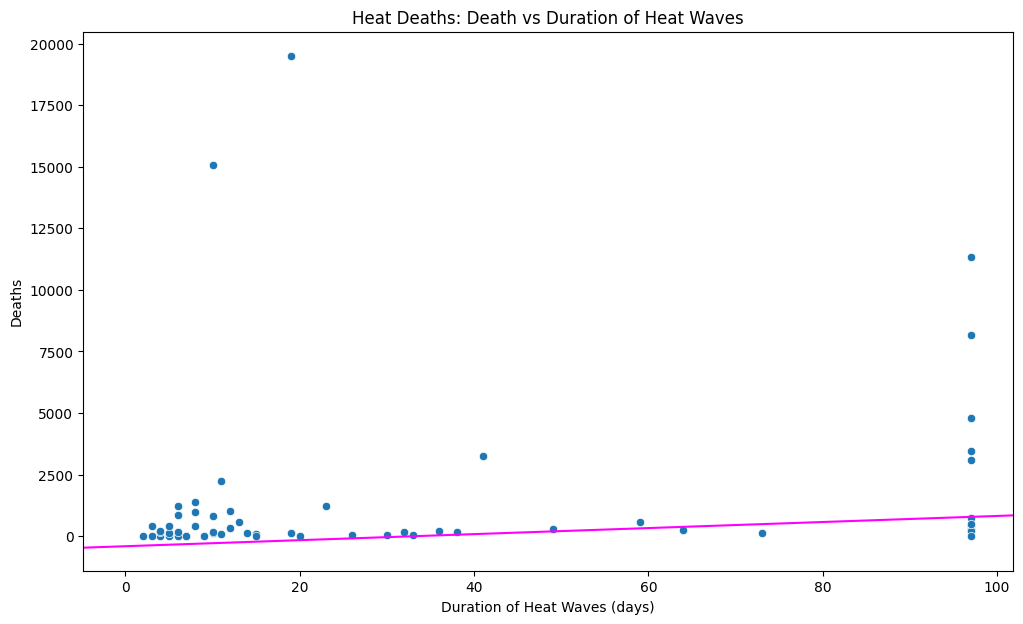

In [52]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=Z['duration'], y=w)

ax.axline(xy1=(0,-408), slope = 12.29, color= 'magenta')
ax.set_xlabel('Duration of Heat Waves (days)')
ax.set_ylabel('Deaths')
ax.set_title('Heat Deaths: Death vs Duration of Heat Waves');

plt.savefig('../images/heat_linear_duration.jpg')

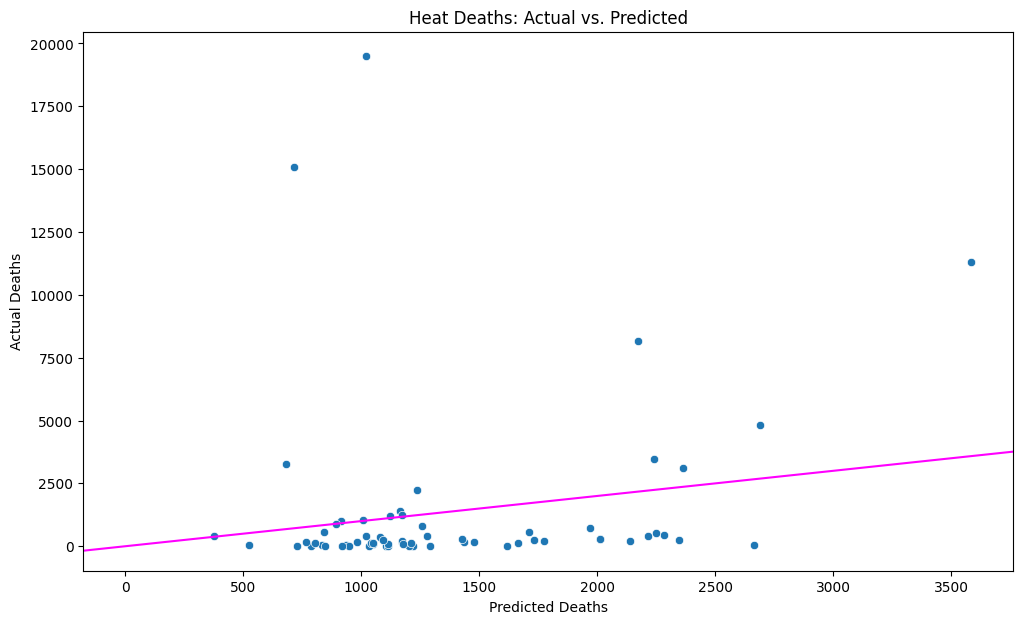

In [127]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=preds, y=w)

ax.axline(xy1=(0,0), slope = 1, color= 'magenta')
ax.set_xlabel('Predicted Deaths')
ax.set_ylabel('Actual Deaths')
ax.set_title('Heat Deaths: Actual vs. Predicted');

plt.savefig('../images/heat_linear_prediction.jpg')

### Predicting Deaths

In [129]:
Z_temp = heat_waves[['duration', 'delta_max_mean_C']].rename(columns={'delta_min_mean_C':'delta_temp_C'})

Z_temp.head()

,duration,delta_max_mean_C
0,3,12.619178
1,3,12.619178
2,3,12.619178
3,2,-40.428123
4,2,-40.428123


In [130]:
hot_preds = pd.DataFrame(pipe_hot.predict(Z), columns=['predicted_deaths'])
hot_deaths = pd.merge(left=Z, right=hot_preds, left_index=True, right_index=True)

In [131]:
hot_deaths['predicted_deaths'].sum()

87647.0

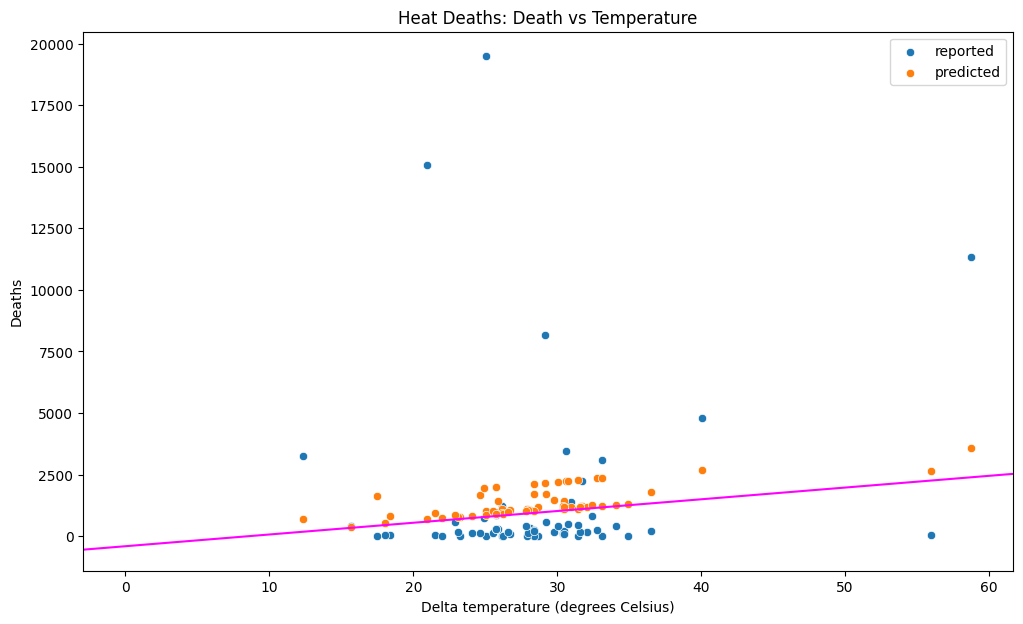

In [132]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=Z['delta_temp_C'], y=w, ax=ax, label='reported')
sns.scatterplot(data = hot_deaths, x='delta_temp_C', y='predicted_deaths', ax=ax, label='predicted')

ax.axline(xy1=(0,-408), slope = 47.64, color= 'magenta')
ax.set_xlabel('Delta temperature (degrees Celsius)')
ax.set_ylabel('Deaths')
ax.set_title('Heat Deaths: Death vs Temperature');

plt.savefig('../images/heat_linear_death_temp_predictions.jpg')

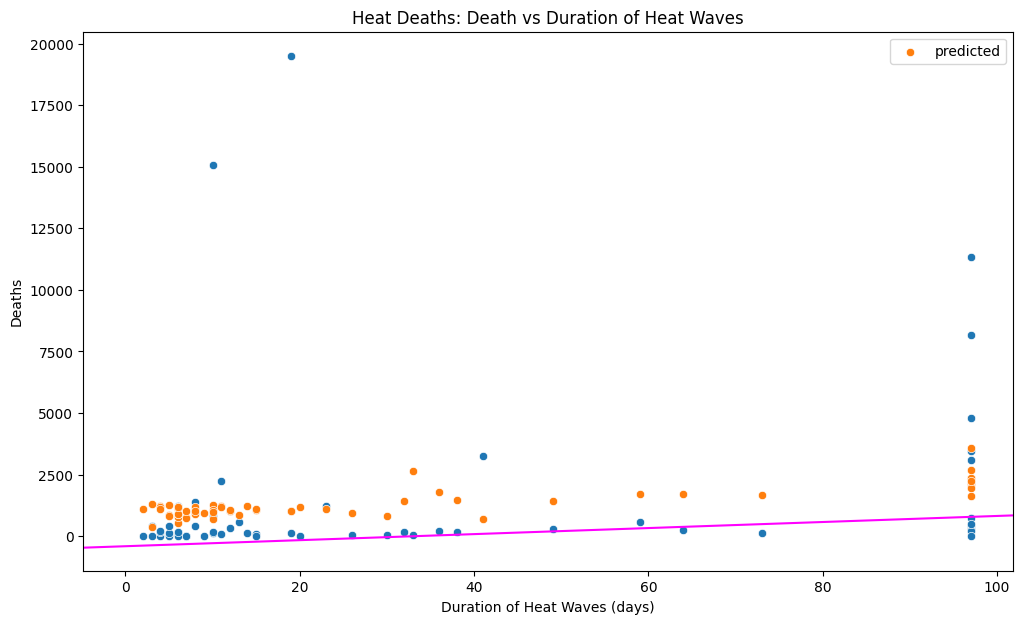

In [133]:
fig, ax = plt.subplots(figsize=(12,7))

sns.scatterplot(x=Z['duration'], y=w)
sns.scatterplot(data = hot_deaths, x='duration', y='predicted_deaths', ax=ax, label='predicted')

ax.axline(xy1=(0,-408), slope = 12.29, color= 'magenta')
ax.set_xlabel('Duration of Heat Waves (days)')
ax.set_ylabel('Deaths')
ax.set_title('Heat Deaths: Death vs Duration of Heat Waves');

plt.savefig('../images/heat_linear_death_duration_predictions.jpg')